In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv('/Users/Pratulya/Desktop/machine-learning/bootcamp/mnist_data/train.csv')

In [3]:
X = ds.values[:, 1:]
labels = ds.values[:, 0]
print(X.shape)
print(labels.shape)

(42000, 784)
(42000,)


In [4]:
X_std = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-03)
print(X.shape)

mean = np.mean(X_std, axis=0)
cov = np.cov(X_std, rowvar=False)

(42000, 784)


In [12]:
print(mean[400:410])
print(cov[510:515, 510:515])

[ 5.33329994e-17 -6.09036631e-18 -3.11708331e-17  5.33752936e-17
  6.55560262e-18 -1.08696121e-17  4.77924578e-17  6.63173220e-17
 -1.52259158e-17  1.87786294e-17]
[[0.99999858 0.76557687 0.40881585 0.14582154 0.02857417]
 [0.76557687 1.00000165 0.76155178 0.39940025 0.15539897]
 [0.40881585 0.76155178 1.00000308 0.75886348 0.41042703]
 [0.14582154 0.39940025 0.75886348 1.00000383 0.76714196]
 [0.02857417 0.15539897 0.41042703 0.76714196 1.00000435]]


In [13]:
eigen = np.linalg.eig(cov)
eigen_values, eigen_vectors = eigen
print(eigen[0])
print(eigen_values.shape, eigen_vectors.shape)
print(eigen_values[:10], eigen_vectors[:5])

[ 4.06953735e+01  2.91104132e+01  2.67824754e+01  2.08140352e+01
  1.80995243e+01  1.57871424e+01  1.38235951e+01  1.25427214e+01
  1.10633458e+01  1.00884280e+01  9.63567153e+00  8.65503342e+00
  8.04063813e+00  7.88045853e+00  7.43578284e+00  7.16691944e+00
  6.73466346e+00  6.61601796e+00  6.42285297e+00  6.26753434e+00
  5.93880986e+00  5.74875539e+00  5.48761995e+00  5.32587848e+00
  5.15144882e+00  4.94641013e+00  4.88778850e+00  4.70682018e+00
  4.46442507e+00  4.36234763e+00  4.32444018e+00  4.22642008e+00
  4.08603974e+00  4.06124905e+00  3.99828135e+00  3.86713085e+00
  3.81813027e+00  3.71178485e+00  3.57335913e+00  3.45679172e+00
  3.41265970e+00  3.36767195e+00  3.25450474e+00  3.23590437e+00
  3.18138861e+00  3.16024404e+00  3.14147237e+00  3.09089670e+00
  3.05773538e+00  2.99697061e+00  2.94751432e+00  2.89871622e+00
  2.84456496e+00  2.82479660e+00  2.79041732e+00  2.76265129e+00
  2.68817647e+00  2.63575872e+00  2.60629010e+00  2.58733239e+00
  2.49974626e+00  2.48439

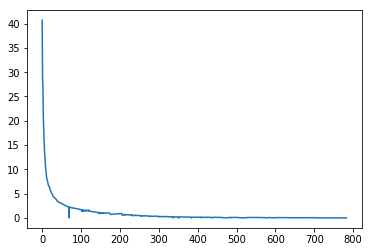

In [14]:
plt.figure()
plt.plot(eigen_values)
plt.show()

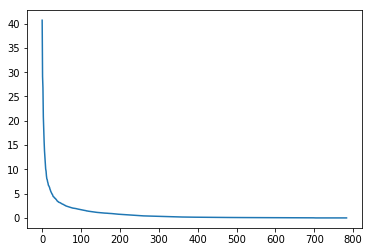

In [15]:
plt.figure()
plt.plot(sorted(eigen_values, reverse=True))
plt.show()

In [16]:
eigen_zipped = zip(eigen_values,eigen_vectors)
eigen_zipped = list(eigen_zipped)
print(len(eigen_zipped))
print(eigen_zipped[100][0])

784
1.7076314529083398


In [17]:
eigen_sorted = sorted(eigen_zipped, key=lambda x: x[0], reverse=True)
eigen_sorted[100]

(1.6811848524258872,
 array([ 1.38519829e-02, -3.43187646e-02,  2.46262618e-02,  7.44064166e-02,
         5.48419391e-02,  1.66377417e-02, -3.43900435e-02, -3.40923237e-02,
        -2.80687099e-04, -5.24930443e-02,  2.94645388e-02, -3.06485882e-02,
        -1.25153533e-02, -5.19124237e-02,  2.53671843e-02,  1.39001546e-02,
         1.24297611e-02, -2.19832453e-02, -5.59556488e-03,  1.63533864e-02,
        -4.18891193e-02,  5.96600849e-02, -9.20606277e-02,  3.82515090e-02,
        -1.17855292e-02,  4.98109601e-02,  7.96797018e-02,  1.88878756e-02,
         2.73931807e-02,  3.66477955e-02,  4.97751863e-02, -2.04636184e-02,
         1.19593248e-02,  9.05566329e-03,  7.55157729e-02,  6.36314385e-02,
         6.44590048e-03,  1.44129161e-02, -4.23304129e-02, -9.23196824e-04,
        -4.81736769e-02,  4.92710557e-02, -1.68201023e-02, -8.42881937e-02,
        -4.65615707e-02, -1.00421428e-01, -3.23097947e-02,  5.33271902e-02,
        -1.92951034e-02,  1.55121603e-02,  1.62656325e-02,  3.15305

In [18]:
eigen_values, eigen_vectors = list(), list()
for lam, vec in eigen_sorted:
    eigen_values.append(lam)
    eigen_vectors.append(vec)
eigen_values = np.array(eigen_values)
eigen_vectors = np.array(eigen_vectors)

print(eigen_values.shape, eigen_vectors.shape)
print(eigen_values[100])
print(eigen_vectors[100])

(784,) (784, 784)
1.6811848524258872
[ 1.38519829e-02 -3.43187646e-02  2.46262618e-02  7.44064166e-02
  5.48419391e-02  1.66377417e-02 -3.43900435e-02 -3.40923237e-02
 -2.80687099e-04 -5.24930443e-02  2.94645388e-02 -3.06485882e-02
 -1.25153533e-02 -5.19124237e-02  2.53671843e-02  1.39001546e-02
  1.24297611e-02 -2.19832453e-02 -5.59556488e-03  1.63533864e-02
 -4.18891193e-02  5.96600849e-02 -9.20606277e-02  3.82515090e-02
 -1.17855292e-02  4.98109601e-02  7.96797018e-02  1.88878756e-02
  2.73931807e-02  3.66477955e-02  4.97751863e-02 -2.04636184e-02
  1.19593248e-02  9.05566329e-03  7.55157729e-02  6.36314385e-02
  6.44590048e-03  1.44129161e-02 -4.23304129e-02 -9.23196824e-04
 -4.81736769e-02  4.92710557e-02 -1.68201023e-02 -8.42881937e-02
 -4.65615707e-02 -1.00421428e-01 -3.23097947e-02  5.33271902e-02
 -1.92951034e-02  1.55121603e-02  1.62656325e-02  3.15305049e-03
 -3.42698836e-02  2.10958688e-03 -3.03884142e-03 -4.91129013e-02
 -1.22695601e-02 -4.91076186e-02  3.14496048e-02  2.8

In [19]:
eigen_values[:10]

array([40.69537351, 29.11041321, 26.7824754 , 20.81403518, 18.09952427,
       15.78714241, 13.82359513, 12.54272145, 11.0633458 , 10.08842803])

In [22]:
eigen_cumulative = np.cumsum(eigen_values) / eigen_values.sum()
print(eigen_cumulative.shape)
print(eigen_cumulative[:10])

(784,)
[0.05752403 0.0986724  0.13653017 0.16595138 0.19153555 0.21385111
 0.23339115 0.25112063 0.26675897 0.28101924]


In [29]:
eigen_cumulative[600]

0.9953750782327176

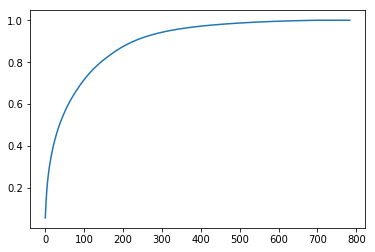

In [30]:
plt.figure()
plt.plot(eigen_cumulative)
plt.show()

In [31]:
def get_k(info=0.95):
    k = 0
    for i in range(eigen_cumulative.shape[0]):
        k = i
        if eigen_cumulative[i] >= info:
            break
    return k

In [36]:
get_k(0.999)

670

In [39]:
def explain_variances(at=None):
    if at is None:
        at = int(eigen_cumulative.shape[0] / 2)
        
    explained = eigen_cumulative[at]
    loss = (1 - explained)
    
#     print("--- At {} ---".format(at))
#     print("Variances Explained: ", explained * 100, '%')
#     print("Loss: ", loss * 100, '%')
    return explained, loss

In [38]:
explain_variances(420)

--- At 420 ---
Variances Explained:  97.55890900678527 %
Loss:  2.441090993214723 %


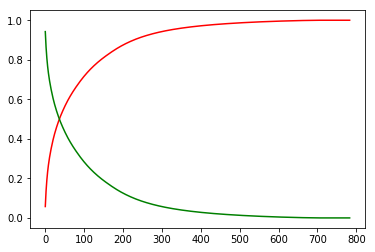

In [40]:
explained =  [explain_variances(i)[0] for i in range(784)]
loss = [explain_variances(i)[1] for i in range(784)]
plt.figure()
plt.plot(explained, 'r')
plt.plot(loss, 'g')
plt.show()

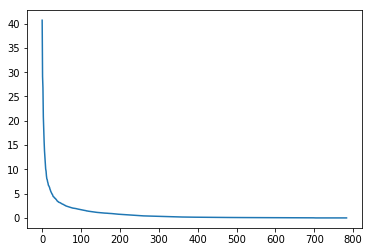

In [42]:
plt.figure()
plt.plot(eigen_values[:])
plt.show()

In [46]:
# Select top k dimensions

k = get_k(info=0.955)
dim = eigen_values.shape[0]
print(k, dim)

334 784


In [47]:
top_k_vectors = []

for i in range(k):
    top_k_vectors.append(eigen_vectors[i].reshape(dim, 1))
    
mat_W = np.hstack(top_k_vectors)

In [48]:
print(mat_W.shape)
print(X_std.shape)

(784, 334)
(42000, 784)


In [49]:
y = X_std.dot(mat_W)
print(y.shape)

(42000, 334)


In [50]:
y[0]

array([-1.71506258e-01, -2.18905874e-01, -2.62678511e-01, -2.93453752e-01,
       -3.07608509e-01, -3.05844977e-01, -2.91946119e-01, -2.67856262e-01,
       -2.38528332e-01, -2.05145485e-01, -1.65178874e-01, -1.28260945e-01,
       -4.00393145e-01, -1.38147853e+00,  1.43978460e+00,  6.46184219e-01,
       -9.43307287e-02, -6.53807478e-02, -4.66135779e-02, -2.92389898e-02,
       -1.45709726e-02, -6.77431640e-03, -4.86996175e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.44753402e-02, -2.89905351e-02, -5.23058146e-02, -7.73800855e-02,
        7.54223051e-01, -6.37594826e-01, -5.43552669e-01, -1.02653765e+00,
        1.06822419e+00,  7.85234750e-03,  4.35892850e-01,  1.52326273e+00,
       -8.58061707e-01, -5.78265255e-01,  2.03464467e-01,  1.19379262e-02,
       -6.71721462e-01,  6.73036084e-01, -9.20615386e-01, -4.93912417e-01,
        5.96114140e-01,  7.10998679e-01, -1.36888682e+00, -1.12206063e+00,
       -1.04526922e-01, -

# SKLearn

In [51]:
from sklearn.decomposition import PCA
import datetime

In [56]:
explain_variances(2)

(0.1365301668653084, 0.8634698331346916)

In [57]:
t0 = datetime.datetime.now()
pca = PCA(n_components=2)
X_sk = pca.fit_transform(X_std)
print("Time Taken: ", datetime.datetime.now() - t0)

Time Taken:  0:00:02.168290


In [58]:
X_sk[0]

array([-5.14046653, -5.22656467])

In [59]:
var = pca.explained_variance_ratio_
cumulative  = np.cumsum(var) / np.sum(var)

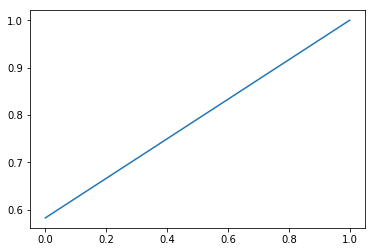

In [60]:
plt.figure()
plt.plot(cumulative)
plt.show()

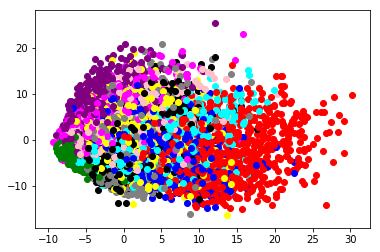

In [62]:
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'cyan', 'purple', 'gray', 'magenta']

plt.figure()
for i in range(10000):
    plt.scatter(X_sk[i,0], X_sk[i,1], color=colors[labels[i]])
plt.show()